In [1]:
import cv2 as cv
import numpy as np
from skimage.util import random_noise

# Load the image
img = cv.imread("upn.jpg")

# Add salt-and-pepper noise to the image.
noise_img_snp = random_noise(img, mode='s&p',amount=0.2)

# Add gaussian noise to the image.
noise_img_gaussian = random_noise(img, mode='gaussian', mean=0, var=0.01)

# Add speckle noise to the image.
noise_img_speckle = random_noise(img, mode='speckle')

# The above function returns a floating-point image on the range [0, 1], thus we changed it to 'uint8' and from [0,255]
noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8')

# Display the noise image
cv.imshow('img snp',noise_img_snp)
cv.imshow('img gaussian',noise_img_gaussian)
cv.imshow('img speckle',noise_img_speckle)
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
import cv2 as cv
import numpy as np
from skimage.util import random_noise

# Load the image
img = cv.imread("monas.jpg")

# Add salt-and-pepper noise to the image.
noise_img_snp = random_noise(img, mode='s&p',amount=0.05)

# Add gaussian noise to the image.
noise_img_gaussian = random_noise(img, mode='gaussian', mean=0, var=0.01)

# Add speckle noise to the image.
noise_img_speckle = random_noise(img, mode='speckle')

# The above function returns a floating-point image on the range [0, 1], thus we changed it to 'uint8' and from [0,255]
noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8')

# image reduction
kernel_3_3 = np.ones((3,3),np.float32)/9
img_snp_average_filter = cv.filter2D(noise_img_snp,cv.CV_8U,kernel_3_3,(-1,-1), delta = 0,
borderType = cv.BORDER_DEFAULT)
img_snp_median_median = cv.medianBlur(noise_img_snp,3)
img_gaussian_average_filter = cv.filter2D(noise_img_gaussian,cv.CV_8U,kernel_3_3,(-1,-1), delta = 0,
borderType = cv.BORDER_DEFAULT)
img_gaussian_median_median = cv.medianBlur(noise_img_gaussian,3)
img_speckle_average_filter = cv.filter2D(noise_img_speckle,cv.CV_8U,kernel_3_3,(-1,-1), delta = 0,
borderType = cv.BORDER_DEFAULT)
img_speckle_median_median = cv.medianBlur(noise_img_speckle,3)

# Display the noise image
cv.imshow('img snp',noise_img_snp)
cv.imshow('img gaussian',noise_img_gaussian)
cv.imshow('img speckle',noise_img_speckle)

# Display the image reduction
cv.imshow('img s&p reduction with average filter', img_snp_average_filter)
cv.imshow('img s&p reduction with median filter', img_snp_median_median)
cv.imshow('img gaussian reduction with average filter', img_gaussian_average_filter)
cv.imshow('img gaussian reduction with median filter', img_gaussian_median_median)
cv.imshow('img speckle reduction with average filter', img_speckle_average_filter)
cv.imshow('img speckle reduction with median filter', img_speckle_median_median)
cv.waitKey(0)
cv.destroyAllWindows()

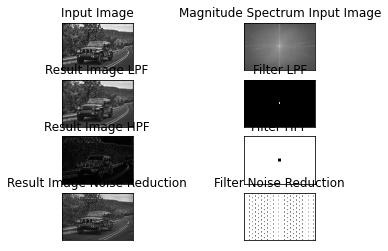

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('halftone.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # center

mask_lpf = np.zeros((rows, cols, 2), np.uint8)
mask_lpf[crow-30:crow+30, ccol-30:ccol+30] = 1

mask_hpf = np.ones((rows, cols, 2), np.uint8)
mask_hpf[crow-50:crow+50, ccol-50:ccol+50] = 0

mask_red = np.ones((rows, cols, 2), np.uint8)

for i in range(60, rows, 135):
    for j in range(100, cols, 200):
        if not (i == 330 and j == 500):
            mask_red[i-10:i+10, j-10:j+10] = 0

for i in range(0, rows, 135):
    for j in range(200, cols, 200):
        if not (i == 330 and j == 500):
            mask_red[max(0,i-15):min(rows,i+15), max(0,j-15):min(cols,j+15)] = 0

fshift_lpf = dft_shift*mask_lpf
f_ishift_lpf = np.fft.ifftshift(fshift_lpf)
img_back_lpf = cv2.idft(f_ishift_lpf)
img_back_lpf = cv2.magnitude(img_back_lpf[:,:,0],img_back_lpf[:,:,1])

fshift_hpf = dft_shift*mask_hpf
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_back_hpf = cv2.idft(f_ishift_hpf)
img_back_hpf = cv2.magnitude(img_back_hpf[:,:,0],img_back_hpf[:,:,1])

fshift_red = dft_shift*mask_red
f_ishift_red = np.fft.ifftshift(fshift_red)
img_back_red = cv2.idft(f_ishift_red)
img_back_red = cv2.magnitude(img_back_red[:,:,0],img_back_red[:,:,1])

I_out_lpf = cv2.normalize(img_back_lpf,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
I_out_hpf = cv2.normalize(img_back_hpf,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
I_out_red = cv2.normalize(img_back_red,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(421),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(img_back_lpf, cmap = 'gray')
plt.title('Result Image LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(mask_lpf[:,:,0], cmap = 'gray')
plt.title('Filter LPF'), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(img_back_hpf, cmap = 'gray')
plt.title('Result Image HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(mask_hpf[:,:,0], cmap = 'gray')
plt.title('Filter HPF'), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(img_back_red, cmap = 'gray')
plt.title('Result Image Noise Reduction'), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(mask_red[:,:,0], cmap = 'gray')
plt.title('Filter Noise Reduction'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imshow('Result Image Filter LPF', I_out_lpf)
cv2.imshow('Result Image Filter HPF', I_out_hpf)
cv2.imshow('Result Image Noise Reduction', I_out_red)
cv2.imshow('Input Image', img)

cv2.waitKey(0)
cv2.destroyAllWindows()